In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('train.csv',usecols=['Age', 'Fare', 'Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
df.shape

(891, 3)

In [12]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [14]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [18]:
X_train

,Age,Fare
140,NaN,15.2458
439,31.0,10.5000
817,31.0,37.0042
378,20.0,4.0125
491,21.0,7.2500
...,...,...
835,39.0,83.1583
192,19.0,7.8542
629,NaN,7.7333
559,36.0,17.4000


In [20]:
y_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64

In [22]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [24]:
X_train.tail()

,Age,Fare,Age_imputed
835,39.0,83.1583,39.0
192,19.0,7.8542,19.0
629,NaN,7.7333,NaN
559,36.0,17.4000,36.0
684,60.0,39.0000,60.0


In [26]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\unnat\AppData\Local\Temp\ipykernel_12776\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C

In [28]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([ 4.  , 21.  , 44.  , 16.  , 54.  , 65.  , 36.  , 18.  , 26.  ,
       45.5 , 21.  , 74.  ,  4.  , 23.  , 36.5 , 18.  , 23.  , 16.  ,
       19.  , 17.  , 17.  , 27.  , 36.  , 22.  , 45.  ,  2.  , 47.  ,
       28.  , 65.  , 31.  , 28.  , 35.  ,  0.83,  8.  , 27.  , 31.  ,
       70.  , 47.  , 39.  , 23.  , 12.  , 35.  , 27.  , 34.  , 24.  ,
       25.  , 26.  , 35.  , 27.  , 23.  , 38.  , 39.  , 18.  , 24.  ,
       29.  , 22.  , 46.  , 15.  , 16.  , 42.  , 29.  , 39.  ,  5.  ,
       40.  ,  4.  ,  1.  , 62.  , 34.  , 50.  , 22.  , 17.  , 18.  ,
       27.  , 21.  , 19.  , 36.  , 46.  , 19.  , 61.  , 19.  , 36.  ,
       19.  , 27.  , 16.  , 36.  , 28.  , 32.  , 27.  ,  1.  , 19.  ,
       50.  , 27.  , 27.  , 17.  , 20.  , 32.  , 49.  , 22.  , 48.  ,
        2.  , 26.  , 61.  , 53.  , 22.  , 40.5 , 20.  , 28.  , 30.  ,
       30.  , 36.  , 32.  , 32.  , 31.  , 19.  , 16.  , 26.  , 50.  ,
       40.  ,  3.  , 22.  , 24.  , 14.  , 28.  ,  8.  , 24.  , 49.  ,
       42.  , 42.  ,

In [30]:
X_train['Age'].isnull().sum()

141

In [32]:
X_train

,Age,Fare,Age_imputed
140,NaN,15.2458,42.0
439,31.0,10.5000,31.0
817,31.0,37.0042,31.0
378,20.0,4.0125,20.0
491,21.0,7.2500,21.0
...,...,...,...
835,39.0,83.1583,39.0
192,19.0,7.8542,19.0
629,NaN,7.7333,20.0
559,36.0,17.4000,36.0


C:\Users\unnat\AppData\Local\Temp\ipykernel_12776\3986834763.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\unnat\AppData\Local\Temp\ipykernel_12776\3986834763.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[

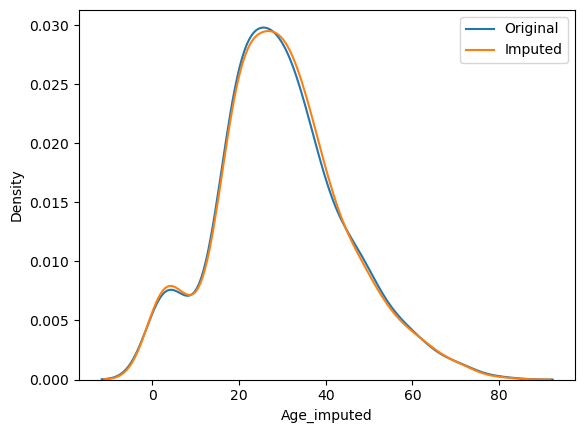

In [36]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

In [38]:
print('Original variable varience: ', X_train['Age'].var())
print('Variable after random imputation: ', X_train['Age_imputed'].var())

Original variable varience:  213.7165085187578
Variable after random imputation:  211.55361720950071


In [40]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2513.549265,79.072379,56.017887
Age,79.072379,213.716509,213.716509
Age_imputed,56.017887,213.716509,211.553617


<Axes: >

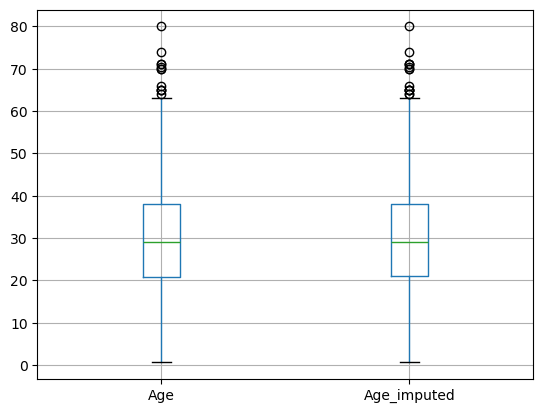

In [42]:
X_train[['Age', 'Age_imputed']].boxplot()

In [ ]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])